In [11]:
from scipy import interpolate
from scipy.interpolate import RectBivariateSpline

import xarray as xr
import netCDF4 as nc
import numpy as np
import math
import matplotlib.cm as cm
import matplotlib.pylab as plt

In [12]:
# Malla escogida (ENTRADA).

base = xr.open_dataset(r"G:\My Drive\UTFSM\memoria\batimetrias\bat_IV_region\bat_l3_iv_region_sur_1sa.grd") 

for i in base.variables.keys():
    print(i)

# Paso escogido (ENTRADA).
# grid_0.4min.grd esta con paso = 0.006666667 = 0.4/60 

plon = 7.5/4/3600                         
plat = 7.5/4/3600

# Nombre del archivo de salida (ENTRADA).

nombre = 'l3_iv_region_sur.grd'

x
y
z


In [13]:
lon = base.variables['x'][:].data               # Extración de variables.
lat = base.variables['y'][:].data
grd = base.variables['z'][:].data

nlon = lon.shape[0]                               # Numero de puntos.
nlat = lat.shape[0]

base_inter = RectBivariateSpline(lat,lon,grd)     # Interpolación.

In [14]:

lat
-45.49374949+45.50208282

0.00833332999999925

In [15]:
# Definición de colores del mapa.

c_max  = np.amax(abs(grd))
c_agua = plt.cm.Blues_r(np.linspace(0,0.5,128))
c_terr = plt.cm.Oranges_r(np.linspace(0.25,0.75,128))
cols   = np.vstack((c_agua, c_terr))
cmap   = cm.colors.LinearSegmentedColormap.from_list("q", cols)

<IPython.core.display.Javascript object>


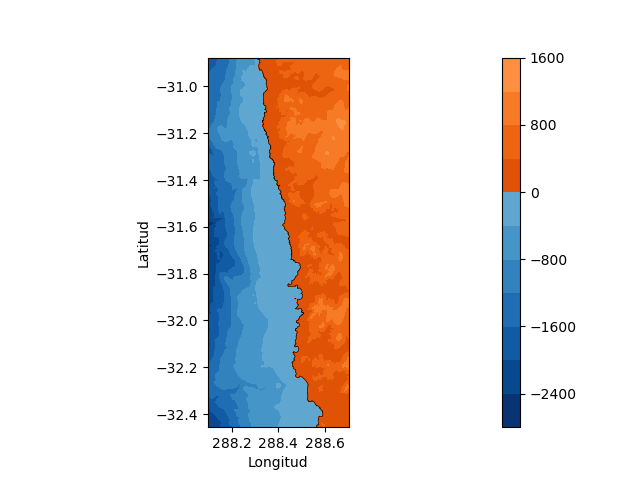

In [16]:
# Grafico (1): Esperar a que se genere el grafico y seleccinar dos punto,
#              la esquina inferior izquierda y la esquina superior derecha,
#              del area que se quiere anidar.

%matplotlib notebook

f,a = plt.subplots()
cp  = a.contourf(lon,lat,grd,10,cmap=cmap,vmin=-c_max, vmax=c_max)

f.colorbar(cp)
a.contour(lon,lat,grd,0,colors = 'k',linewidths=0.4)
a.axis('scaled')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

pos = []                                            # Aquí va guardando las ubicaciones de los click.
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ppx, ppy = zip(*pos)                            # Coordenada (x) e (y) de los click.
    plt.scatter(ppx,ppy,s=2,c='r',marker='x');      # Inform matplotlib of the new data.
    plt.draw()                                      # Redraw.

f.canvas.mpl_connect('button_press_event', onclick)
f.show()

In [17]:
pos

[]

In [18]:
# Corregir a mano esquinas
pos=[
    [288.2,-32.2],
    [288.6,-31.6]
]


In [19]:
llon = abs(pos[0][0]-pos[1][0])       # Dimensiones.
llat = abs(pos[0][1]-pos[1][1])

pos_lon = pos[0][0]                    # Coordenadas como numero.
pos_lat = pos[0][1]

dif_lon = 1000                         # Diferencia inicial.
dif_lat = 1000
po_lon = 0                             # Posición valor mas cercano.
po_lat = 0
va_lon = 0                             # Valor mas cercano.
va_lat = 0

for i in range(0, nlon-1):
    dif = abs(lon[i]-pos_lon)
    if dif < dif_lon:
        po_lon = i
        va_lon = lon[i]
        dif_lon = dif
    else:
        continue

for i in range(0, nlat-1):
    dif = abs(lat[i]-pos_lat)
    if dif < dif_lat:
        po_lat = i
        va_lat = lat[i]
        dif_lat = dif
    else:
        continue

In [20]:
nlon1 = math.ceil(llon/plon)           # Nuevo numero de puntos.
nlat1 = math.ceil(llat/plat)

lon1 = np.zeros(int(nlon1))                   # Nuevos componentes.                          
lat1 = np.zeros(int(nlat1))
grd1 = np.zeros((int(nlat1),int(nlon1)))

lon1[0] = va_lon                         # Rellenado de componentes.
lat1[0] = va_lat

for i in range(1, int(nlon1)):
    lon1[i] = lon1[i-1]+plon

for i in range(1, int(nlat1)):
    lat1[i] = lat1[i-1]+plat

for i in range(0, int(nlon1)):
    for j in range(0,int(nlat1)):
        grd1[j,i] = base_inter(lat1[j],lon1[i])[0][0]

In [21]:
# Nueva base: Esta parte genera el nuevo archivo .grd.

base3 = xr.Dataset({'z': (['y', 'x'], grd1)},coords={'x': lon1,'y': lat1})

base3.to_netcdf(nombre,format='NETCDF3_CLASSIC')

<IPython.core.display.Javascript object>


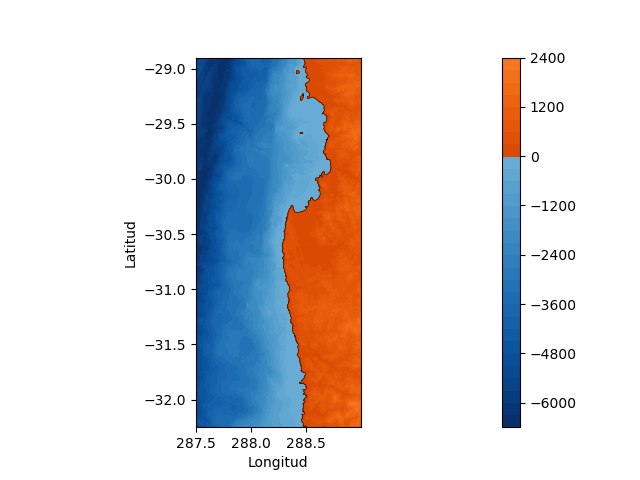

Text(0, 0.5, 'Latitud')

In [13]:
# Grafico (2): Para revisar.

c_max  = np.amax(abs(grd1))

f,a = plt.subplots()
cp  = a.contourf(lon1,lat1,grd1,30,cmap=cmap,vmin=-c_max, vmax=c_max)
f.colorbar(cp)
a.contour(lon1,lat1,grd1,0,colors = 'k',linewidths=0.4)

a.axis('scaled')
plt.xlabel('Longitud')
plt.ylabel('Latitud')